## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0)
pd.set_option('display.max_columns', 50)

%matplotlib inline

## Import dataset

In [ ]:
df = pd.read_csv('BankChurners.csv')
# remove the last 2 columns as this contains probabilities from the original file
df = df[df.columns[:-2]]

## Exploratory Data Analysis (EDA)

### Describe the data

In [ ]:
# check if the Data loaded correctly
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# check dimensions
df.shape

(10127, 21)

In [ ]:
# check for Column Names
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
# check the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# change column names to lowercase to match conventions
df = df.rename(columns=str.lower)

# rename clientnum column to 'client_no
df.rename(columns = {'clientnum':'client_no'}, inplace = True)

# verify if changes were applied
df.columns

Index(['client_no', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

### Verify Data Quality

#### How clean is your dataset?
- spelling/case check for strings
- correct data types
- duplicate values
- correct dimensions - no missing rows or columns

Upon inspecting the dataset, there were no duplicates found for all features, no mixed cases or misspells for categorical features, and dimensions and data types were correct for all features.

In [ ]:
# check for duplicates
df.duplicated().value_counts()

False    10127
dtype: int64

In [ ]:
# inspect tagging of attrition_flag if tagging is correct
df["attrition_flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

In [ ]:
# attrition flag needs to be converted to 0 and 1
df['churned'] = df['attrition_flag'].apply(lambda x : 0 if x == 'Existing Customer' else 1)

In [ ]:
# drop column attrition_flag since it was already converted to 0 and 1
df.drop('attrition_flag', axis=1, inplace = True)

# check dataframe if changes were applied
df.head()

,client_no,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churned
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


##### There is a class imbalance on the target variable. This issue was addressed on the modeling stage as this could affect the model predictions.

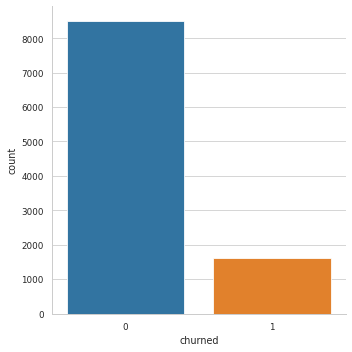

In [ ]:
# visualize target variable
sns.catplot(x = 'churned', kind = 'count', data = df)

In [ ]:
# split the dataset into categorical and numerical features

# categorical Features Only
df_cat = df.select_dtypes(include=['object'])

# numerical Features Only
df_num = df.select_dtypes(include=['int64','float64'])

In [ ]:
# for loop to go over all the features and print out the unique values for each feature
# checks for mixed cases or misspells for categorical features

for cat_col in df_cat.columns:
    print (df[cat_col].value_counts())
    print ("\n---------")

F    5358
M    4769
Name: gender, dtype: int64

---------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

---------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

---------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64

---------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64

---------


In [ ]:
# check number of unique values of the primary key
df['client_no'].nunique()

10127

#### Are there columns with inconsistent formatting, units of measure etc.?
- Check all columns with monetary or date values

In [ ]:
df['credit_limit'].value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: credit_limit, Length: 6205, dtype: int64

In [ ]:
df['income_category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64

Incorrect data entries for the columns customer_age and credit_limit were checked for 0 values, since 0 values for these features are treated as null or incorrect data.

In [ ]:
# check summary statistics of numerical features

# for customer age and credit limit, check for 0 values - treated as null or incorrect data
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
client_no,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
customer_age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
total_relationship_count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
months_inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
contacts_count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
credit_limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
total_revolving_bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
avg_open_to_buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


#### Check for incorrect data entries, null, or missing values

In [ ]:
# count for missing values for the entire dataframe
# check if there is any null values

df.isna().sum() # No NAs in dataset

client_no                   0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
churned                     0
dtype: int64

#### Which attributes have outliers? Why are they considered as outliers? What are you going to do with these?

Some outliers were detected by the boxplots on transaction-related features, but these were considered as expected outliers found in bank/financial data. It is expected for some customers to have a more expensive lifestyle than others. Hence, none of these outliers are due to incorrect data or entries (e.g. customers aged at 100), and no observations were dropped.

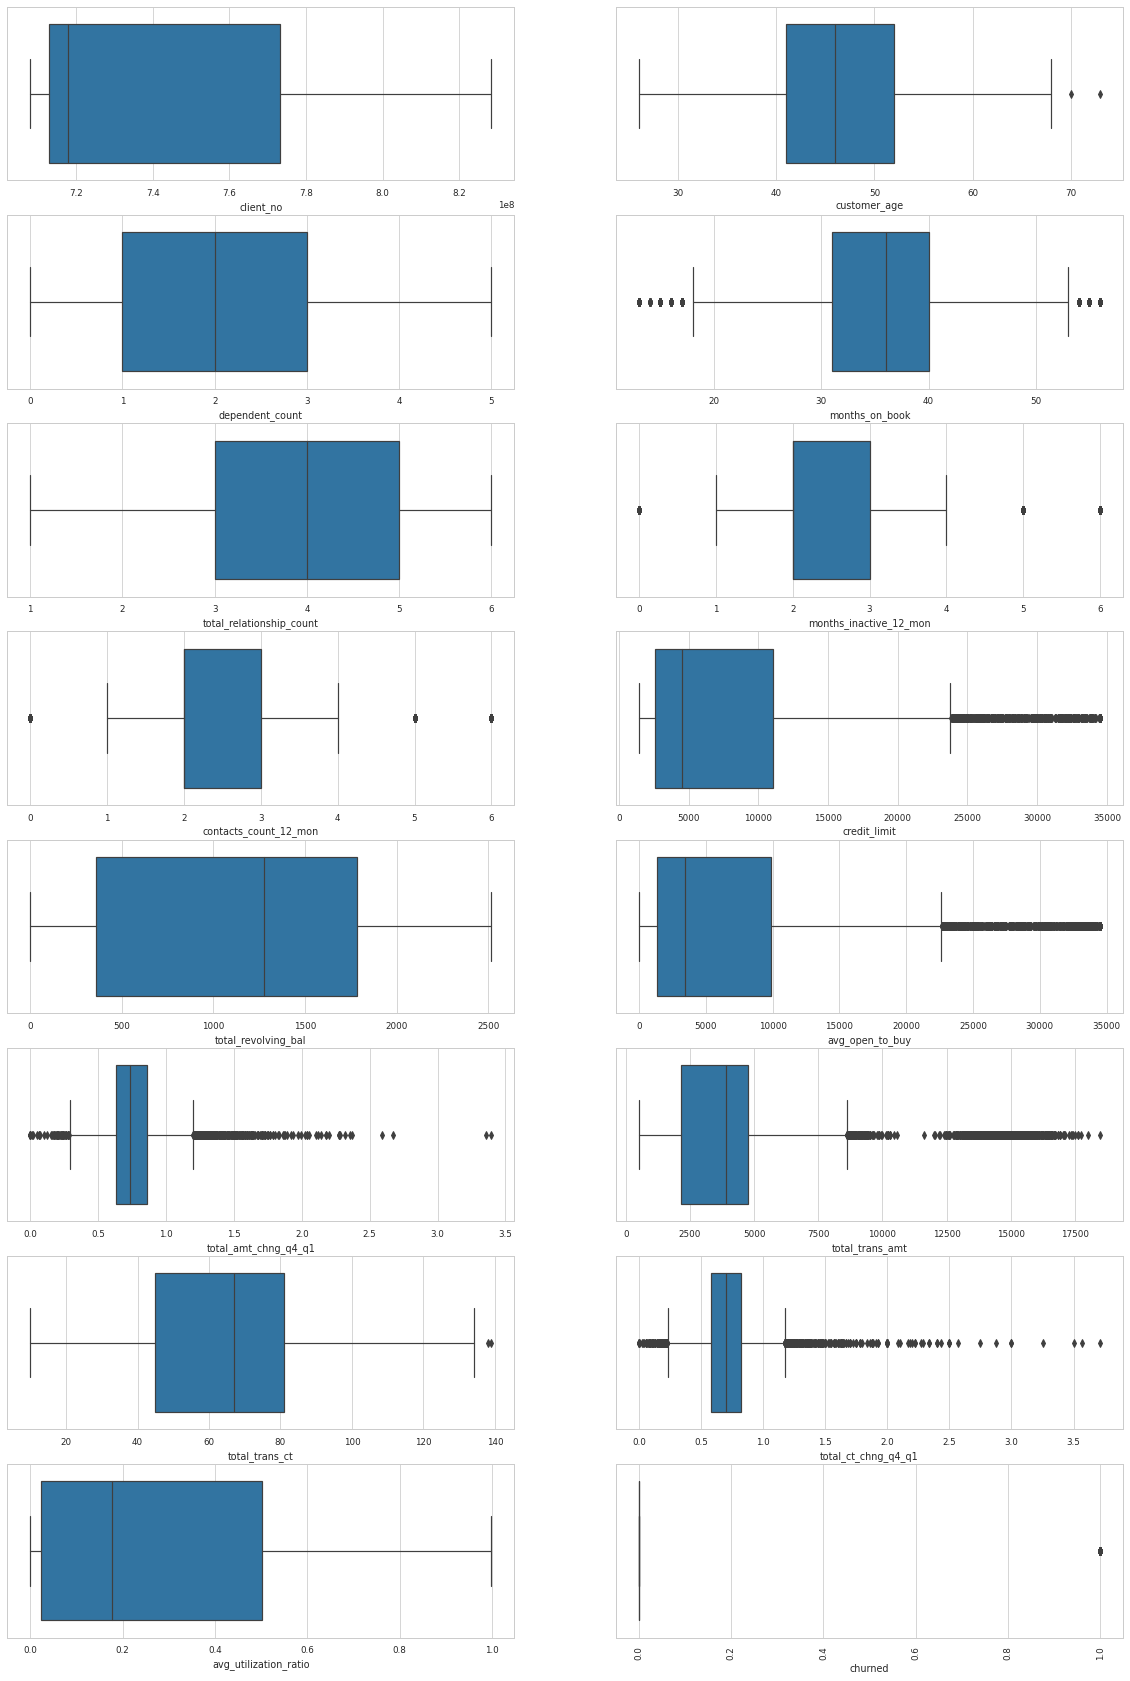

In [ ]:
# box plots for numerical features to check outliers
f, axes = plt.subplots(8, 2, figsize = (20,30))

for i, col in enumerate(df_num.columns):
  sns.boxplot(x=df[col], data=df, ax=axes[i//2][i % 2])
  plt.xticks(rotation=90);

#### Which among your variables have a strong correlation with each other?

In [ ]:
corrmat = df.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


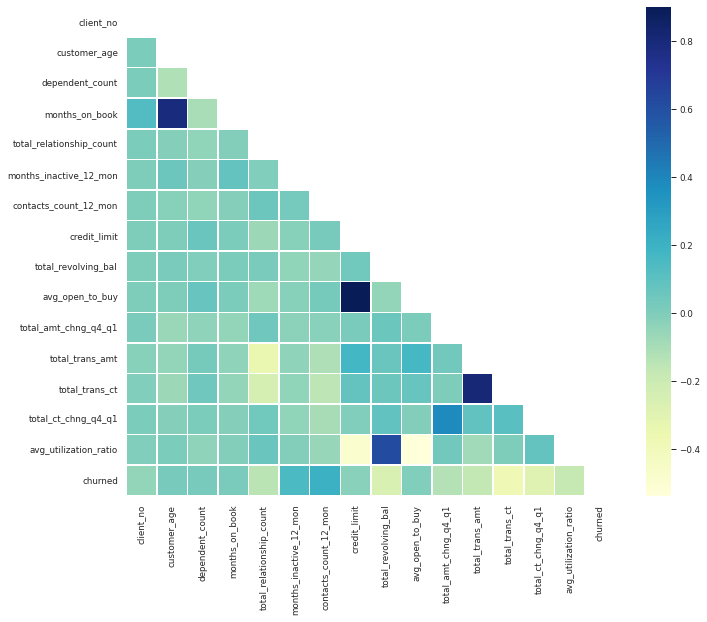

In [ ]:
# Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap="YlGnBu", vmax=.9, square=True, linewidths=.5, ax=ax);

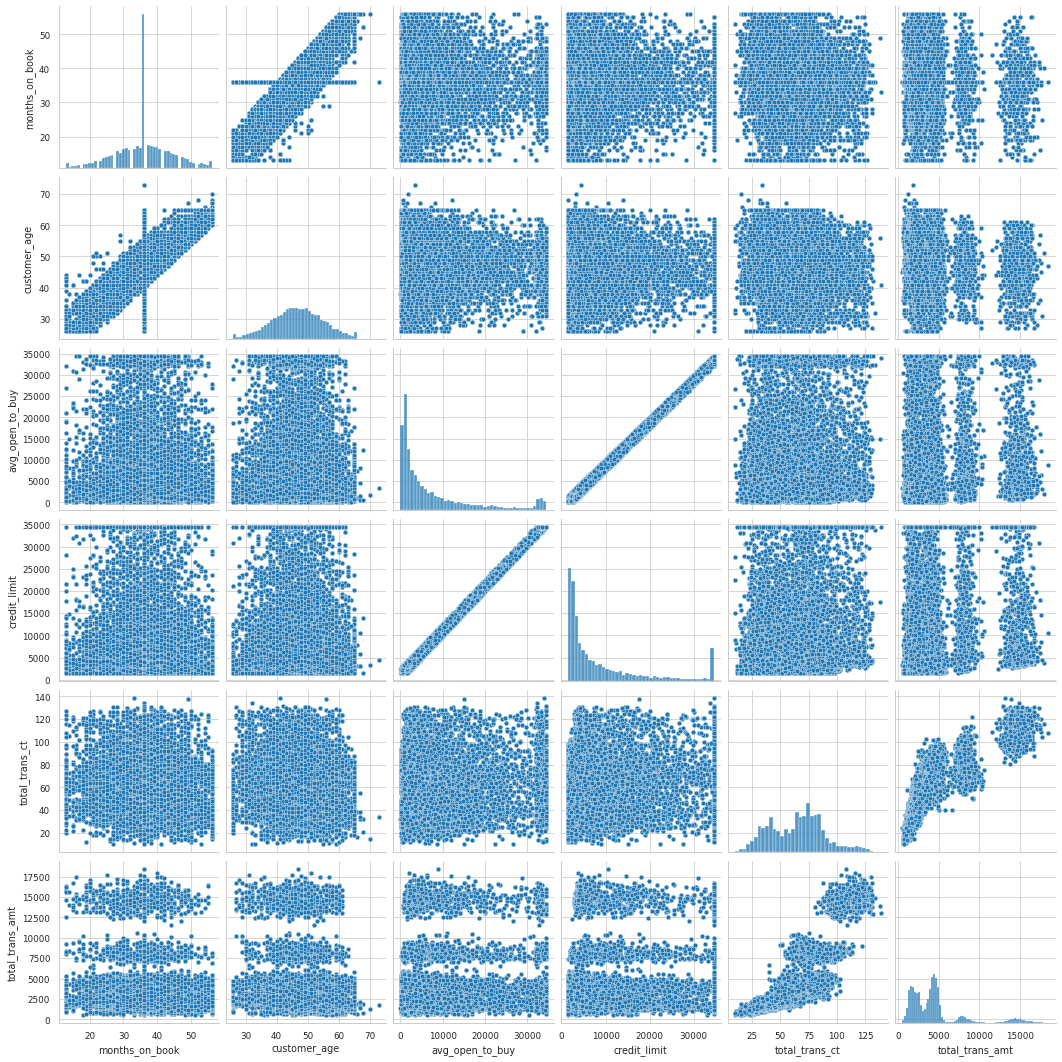

In [ ]:
# visualize correlation of Months_on_book, Customer_Age, Avg_Open_To_Buy, Credit_Limit, Total_Trans_Ct, Total_Trans_Amt

high_corr = df[['months_on_book', 'customer_age', 'avg_open_to_buy', 'credit_limit', 'total_trans_ct', 'total_trans_amt']]

sns.pairplot(high_corr);

## Other Visualizations

#### There are notable patterns on numerical features below for churned customers and existing customers
1. **Total transaction amount change** and **total transaction count change** from Q4 to Q1 for existing customers are much higher compared to churned customers.
2. Same patterns appear on the **total transaction amount** and **total transaction count**. Existing customers, on average, spend more and transact more than churned customers.

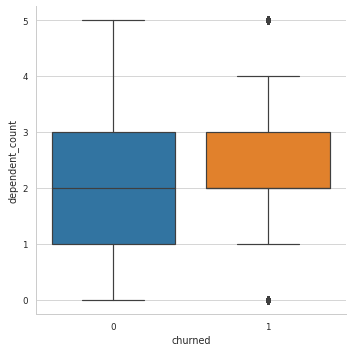

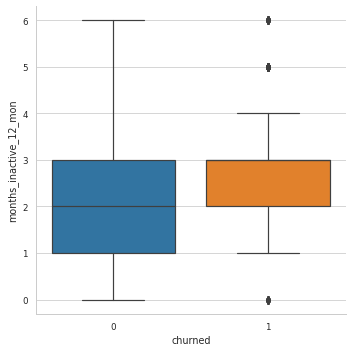

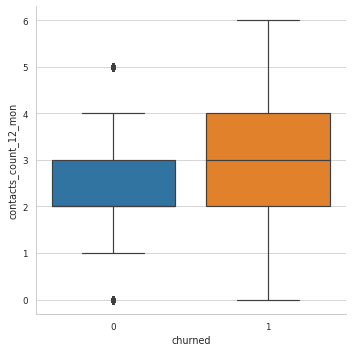

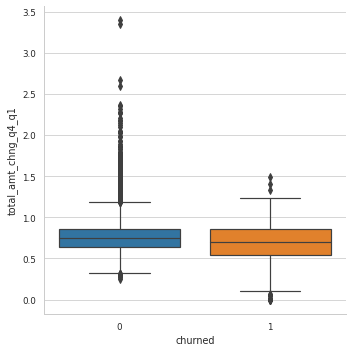

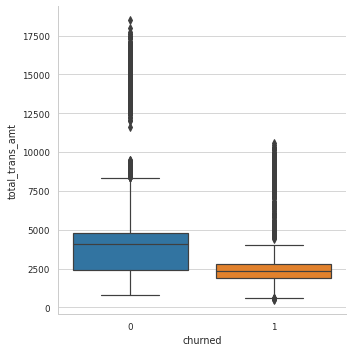

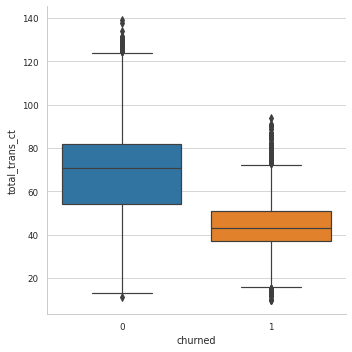

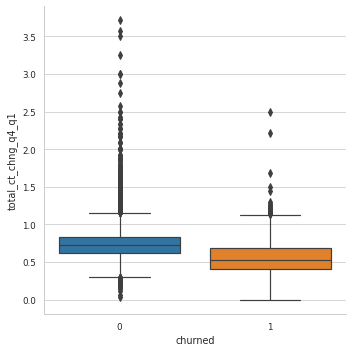

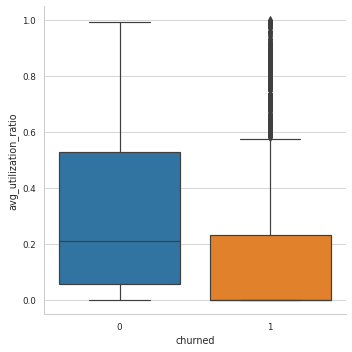

In [ ]:
# catplot for numerical features with churn tagging
num_cols = ['dependent_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'total_amt_chng_q4_q1',
            'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']
# no patterns seen for the ff cols:
# 'customer_age', 'dependent_count', 'months_on_book',
# 'total_relationship_count', 'months_inactive_12_mon',
# 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
# 'avg_open_to_buy',
for col in num_cols:
  sns.catplot(x = "churned", y = col, kind = "box", data = df)

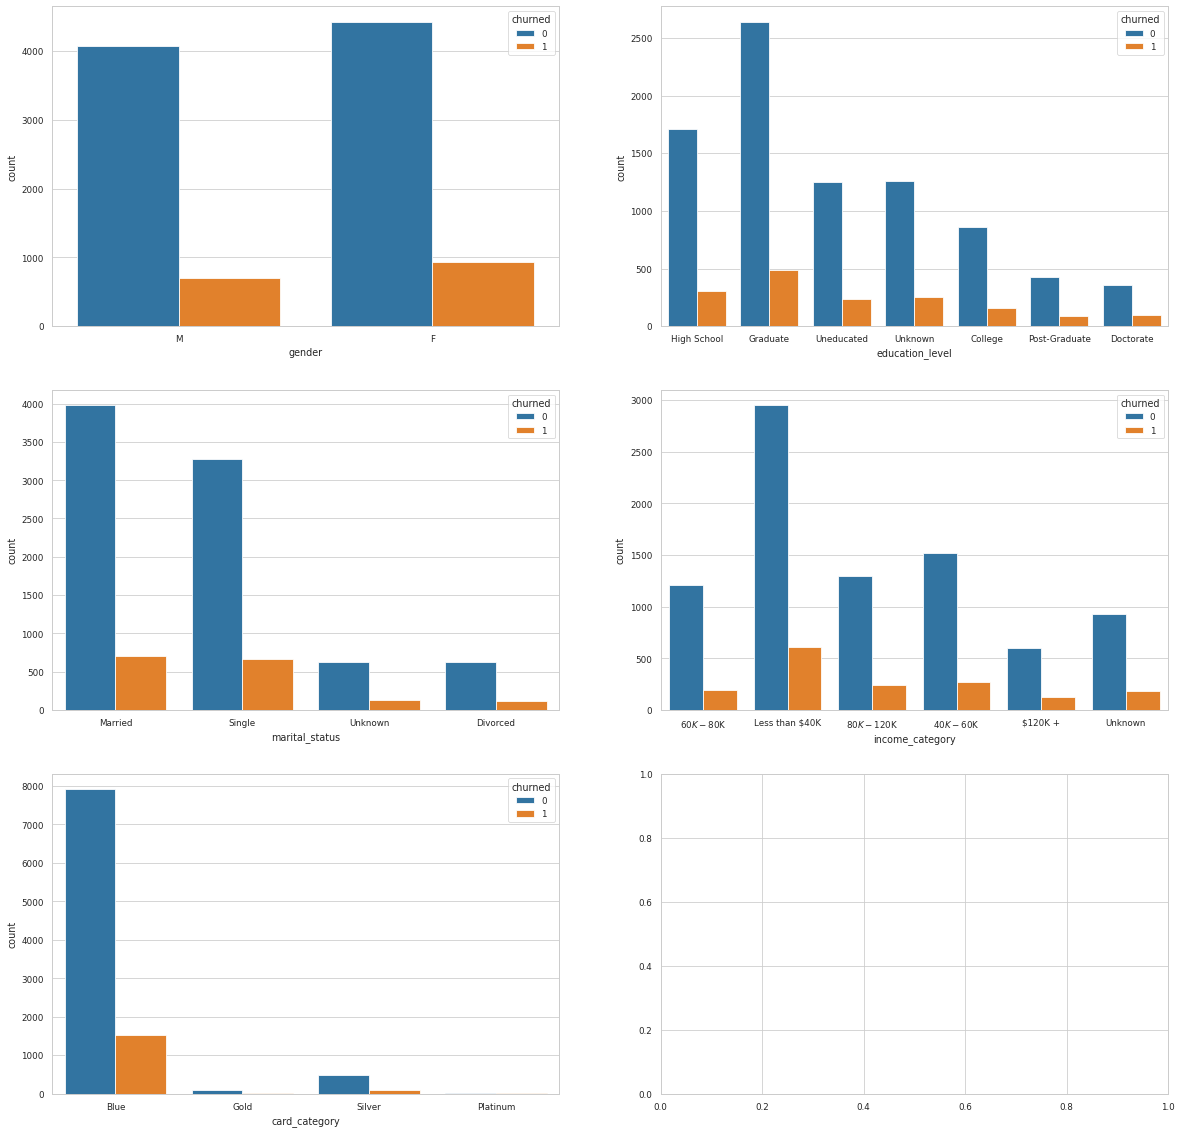

In [ ]:
# count plots for categorical features - with churn tagging
f, axes = plt.subplots(3, 2, figsize = (20,20))

for i, col in enumerate(df_cat.columns):
      sns.countplot(x = df[col], hue = 'churned', data = df, ax=axes[i//2][i % 2])